In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

df1 = pd.read_csv('/content/drive/MyDrive/Retail_Data_Response.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Retail_Data_Transactions.csv')

In [ ]:
df = pd.merge(df1, df2, on='customer_id', how='inner', suffixes=('_x', '_y'))
print("Merged Shape:", df.shape)
df.head()

Merged Shape: (124969, 4)


,customer_id,response,trans_date,tran_amount
0,CS1112,0,1/14/2015,39
1,CS1112,0,7/16/2014,90
2,CS1112,0,4/29/2014,63
3,CS1112,0,12/4/2014,59
4,CS1112,0,4/8/2012,56


In [ ]:
df.dtypes

,0
customer_id,object
response,int64
trans_date,object
tran_amount,int64


In [ ]:
df.isnull().sum()

,0
customer_id,0
response,0
trans_date,0
tran_amount,0


In [ ]:
df.shape

(124969, 4)

In [ ]:
df.describe()

,response,tran_amount
count,124969.000000,124969.000000
mean,0.110763,64.995143
std,0.313840,22.860059
min,0.000000,10.000000
25%,0.000000,47.000000
50%,0.000000,65.000000
75%,0.000000,83.000000
max,1.000000,105.000000


In [ ]:
df

,customer_id,response,trans_date,tran_amount
0,CS1112,0,1/14/2015,39
1,CS1112,0,7/16/2014,90
2,CS1112,0,4/29/2014,63
3,CS1112,0,12/4/2014,59
4,CS1112,0,4/8/2012,56
...,...,...,...,...
124964,CS9000,0,5/12/2012,53
124965,CS9000,0,5/8/2014,20
124966,CS9000,0,2/28/2015,34
124967,CS9000,0,6/1/2012,37


In [ ]:
print(df1.columns)

Index(['customer_id', 'response'], dtype='object')


In [ ]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype(np.int64)

In [ ]:
print(df['trans_date'].dtypes)   # should return: datetime64[ns]
print(df['trans_date'].head())   # to see the converted dates


datetime64[ns]
0   2015-01-14
1   2014-07-16
2   2014-04-29
3   2014-12-04
4   2012-04-08
Name: trans_date, dtype: datetime64[ns]


In [ ]:
set(df['response'])

{0, 1}

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



Empty DataFrame
Columns: [customer_id, response, trans_date, tran_amount]
Index: []


<function matplotlib.pyplot.show(close=None, block=None)>

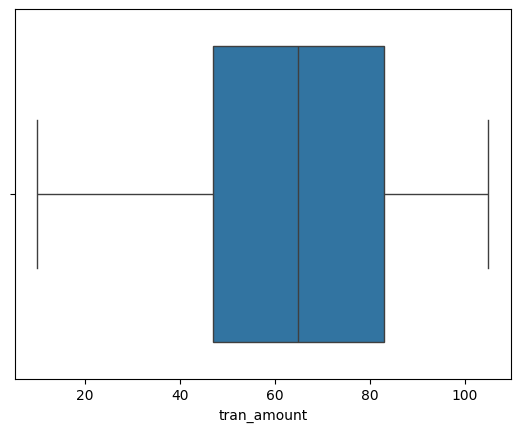

In [ ]:
# calculaate Z score
z_score = np.abs(stats.zscore(df['tran_amount']))

#set a thresold
thresold = 3
outliers = z_score > thresold
print(df[outliers])

sns.boxplot(x=df['tran_amount'])
plt.show

In [ ]:
# create a new column named - month
df['month'] = df['trans_date'].dt.month

In [ ]:
df


,customer_id,response,trans_date,tran_amount,month
0,CS1112,0,2015-01-14,39,1
1,CS1112,0,2014-07-16,90,7
2,CS1112,0,2014-04-29,63,4
3,CS1112,0,2014-12-04,59,12
4,CS1112,0,2012-04-08,56,4
...,...,...,...,...,...
124964,CS9000,0,2012-05-12,53,5
124965,CS9000,0,2014-05-08,20,5
124966,CS9000,0,2015-02-28,34,2
124967,CS9000,0,2012-06-01,37,6


In [ ]:
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
print(monthly_sales)

   month  tran_amount
0      8       726775
1     10       725058
2      1       724089


In [ ]:
customer_count = df['customer_id'].value_counts().reset_index()
customer_count

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS2620,35
4,CS5109,35
...,...,...
6879,CS7716,4
6880,CS7333,4
6881,CS8559,4
6882,CS7224,4


/tmp/ipython-input-31-585598853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='count', data=top_customers_count, palette=colors)


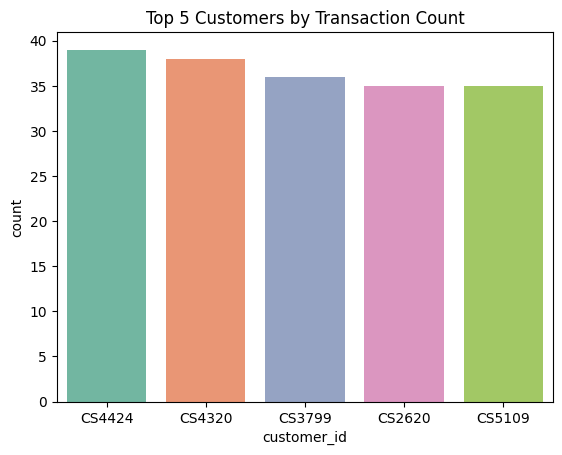

In [ ]:
#Count transactions per customer
top_customers_count = df['customer_id'].value_counts().head(5).reset_index()
top_customers_count.columns = ['customer_id', 'count']

#Plot
sns.barplot(x='customer_id', y='count', data=top_customers_count)
colors = sns.color_palette('Set2', n_colors=5)
sns.barplot(x='customer_id', y='count', data=top_customers_count, palette=colors)
plt.title('Top 5 Customers by Transaction Count')
plt.show()



In [ ]:
customers_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customers_sales

top_5_sales = customers_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


/tmp/ipython-input-34-3651612913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales, palette=colors)


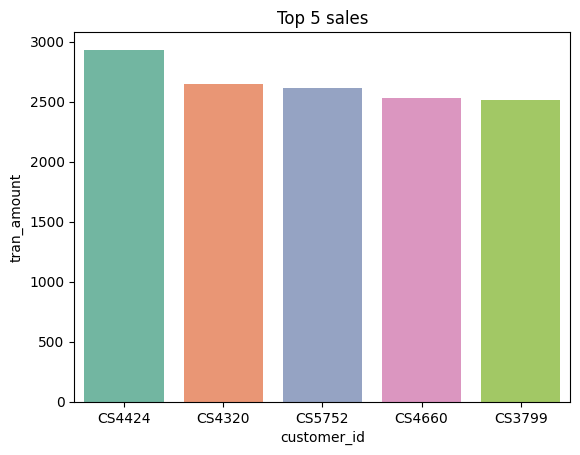

In [ ]:
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales)
colors = sns.color_palette('Set2', n_colors=5)
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales, palette=colors)
plt.title('Top 5 sales')
plt.show()

# **TIME SERIES ANALYSIS**


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

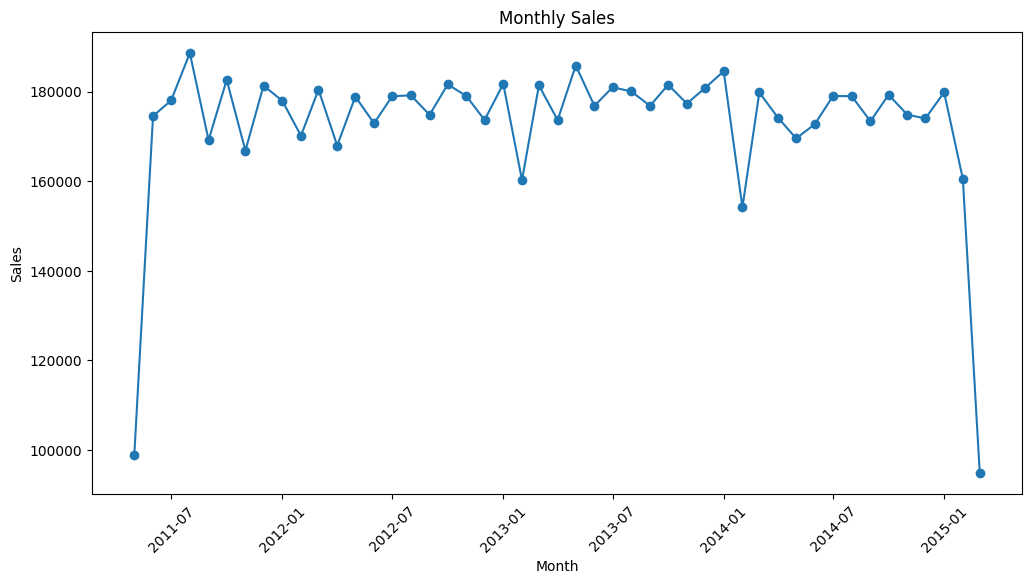

In [ ]:
import matplotlib.dates as mdates
df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt

**Cohort Segmentation**

In [ ]:
#recency
Recency = df.groupby('customer_id')['trans_date'].max().reset_index()
Recency['Recency'] = (df['trans_date'].max() - Recency['trans_date']).dt.days
Recency

#Frequency
frequencies = df['customer_id'].value_counts().reset_index()
frequencies.columns = ['customer_id', 'Frequency']
frequencies

#Monetary
monetary = df.groupby('customer_id')['tran_amount'].sum().reset_index()
monetary.columns = ['customer_id', 'Monetary']
monetary
#Combine
cohort_data = pd.merge(Recency, frequencies, on='customer_id')
cohort_data = pd.merge(cohort_data, monetary, on='customer_id')
cohort_data

,customer_id,trans_date,Recency,Frequency,Monetary
0,CS1112,2015-01-14,61,15,1012
1,CS1113,2015-02-09,35,20,1490
2,CS1114,2015-02-12,32,19,1432
3,CS1115,2015-03-05,11,22,1659
4,CS1116,2014-08-25,203,13,857
...,...,...,...,...,...
6879,CS8996,2014-12-09,97,13,582
6880,CS8997,2014-06-28,261,14,543
6881,CS8998,2014-12-22,84,13,624
6882,CS8999,2014-07-02,257,12,383


In [ ]:
print(cohort_data.columns.tolist())

['customer_id', 'trans_date', 'Recency', 'Frequency', 'Monetary']


In [ ]:
def segmentation_customer(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 5 and row['Monetary'] >= 1000:
        return 'High Value'
    elif (31 <= row['Recency'] <= 90) and (10 < row['Frequency'] < 15) and (500 < row['Monetary'] < 1000):
        return 'Mid Value'
    else:
        return 'Low Value'
cohort_data['Segmentation'] = cohort_data.apply(segmentation_customer, axis=1)
cohort_data

,customer_id,trans_date,Recency,Frequency,Monetary,Segmentation
0,CS1112,2015-01-14,61,15,1012,Low Value
1,CS1113,2015-02-09,35,20,1490,Low Value
2,CS1114,2015-02-12,32,19,1432,Low Value
3,CS1115,2015-03-05,11,22,1659,High Value
4,CS1116,2014-08-25,203,13,857,Low Value
...,...,...,...,...,...,...
6879,CS8996,2014-12-09,97,13,582,Low Value
6880,CS8997,2014-06-28,261,14,543,Low Value
6881,CS8998,2014-12-22,84,13,624,Mid Value
6882,CS8999,2014-07-02,257,12,383,Low Value


# **Churn Analysis**

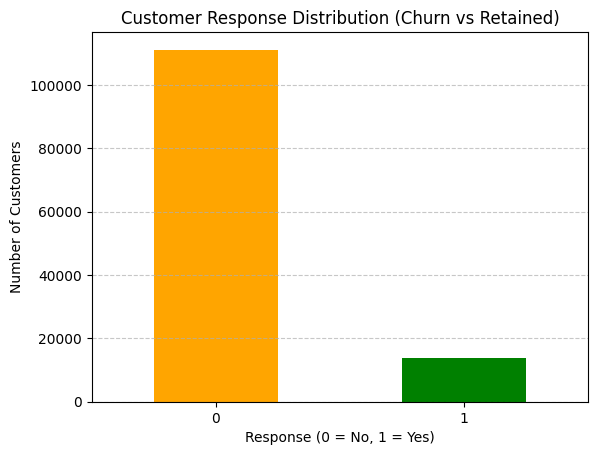

In [ ]:
churn_counts = df['response'].value_counts()

# Plot it
churn_counts.plot(kind='bar', color=['orange', 'green'])

# Add labels and title
plt.title('Customer Response Distribution (Churn vs Retained)')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show it
plt.show()

**Analyzing Customers**

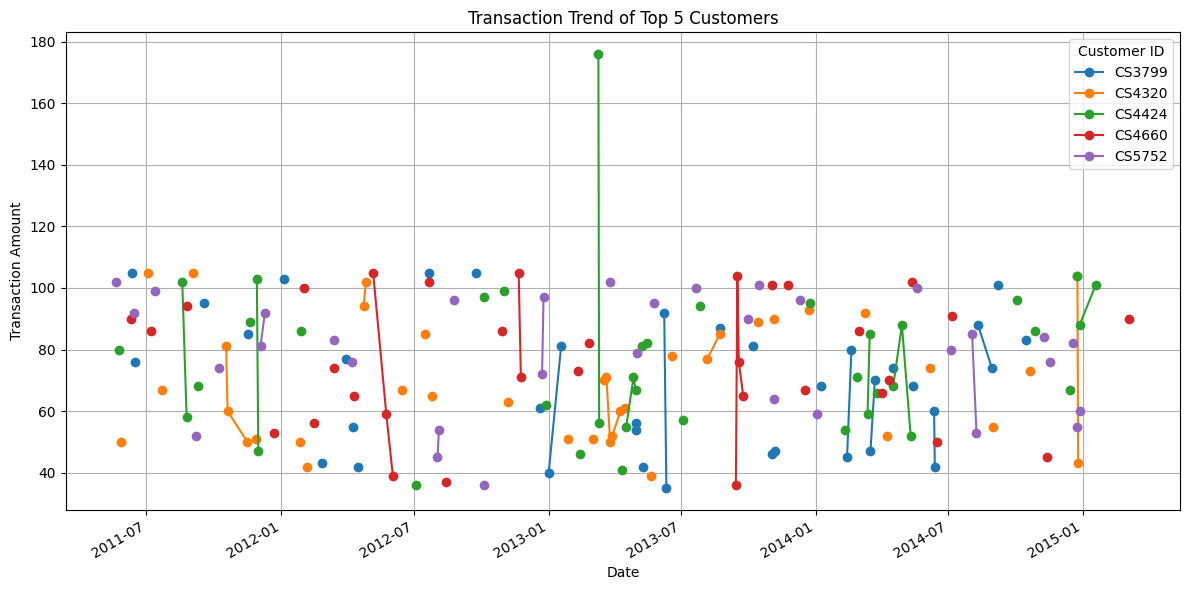

In [ ]:
# Get total spend per customer
monetary = df.groupby('customer_id')['tran_amount'].sum().reset_index()

# Get top 5 customers by spending
top_customers_count = monetary.sort_values(by='tran_amount', ascending=False).head(5)

#Filter original data for those top 5 customers
top_customers_df = df[df['customer_id'].isin(top_customers_count['customer_id'])]

# Ensure date is datetime type
top_customers_df['trans_date'] = pd.to_datetime(top_customers_df['trans_date'])

#Group by trans_date & customer
top_customer_sales = top_customers_df.groupby(['trans_date', 'customer_id'])['tran_amount'].sum().unstack()

#Plot
top_customer_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Transaction Trend of Top 5 Customers')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend(title='Customer ID')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

,customer_id,response,trans_date,tran_amount,month,month_year
0,CS1112,0,2015-01-14,39,1,2015-01
1,CS1112,0,2014-07-16,90,7,2014-07
2,CS1112,0,2014-04-29,63,4,2014-04
3,CS1112,0,2014-12-04,59,12,2014-12
4,CS1112,0,2012-04-08,56,4,2012-04
...,...,...,...,...,...,...
124964,CS9000,0,2012-05-12,53,5,2012-05
124965,CS9000,0,2014-05-08,20,5,2014-05
124966,CS9000,0,2015-02-28,34,2,2015-02
124967,CS9000,0,2012-06-01,37,6,2012-06


Submitted By:  
**Sourav Ranjan Thakur**  
B.Com (Accounting Hons), Data Science Learner  
Email: thakursourav2208@gmail.com  
LinkedIn: https://www.linkedin.com/in/sourav2208/

🎯 Internship Program:  
**Internship Studio - Data Analytics Internship**

📅 Submission Date:  
12th July 2025

📍 Tools Used:  
Python, Pandas, NumPy, Seaborn, Matplotlib, Google Colab

# **Objective**
The objective of this project is to analyze customer transaction and response data in the retail domain using Python and data analytics techniques. The main goals are:

* To clean, merge, and prepare the raw data for analysis

* To explore customer behavior using EDA (Exploratory Data Analysis)

* To identify outliers and data patterns through statistical techniques

* To segment customers based on the RFM (Recency, Frequency, Monetary) model

* To visualize insights that help in identifying high-value, mid-value, and     churn-prone customers

* To support business decisions by recommending actions based on customer segments

# **📊 Key Insights**
* A large number of customers are classified as low-value based on their recency, frequency, and monetary activity.

* The top 5 customers contribute a significant portion of total revenue.

* Most customers who responded positively (response = 1) are also among those with higher frequency and monetary value.

* Outliers were detected in transaction amounts, indicating a few unusually high spenders.

* Customer activity varies over time — some customers are active consistently, while others show irregular patterns.

* The churn rate is noticeable; a significant percentage of customers did not respond or engage recently.

# **Recommendations**
* Retarget mid-value customers with promotional offers to increase their transaction frequency and spending.

* Re-engage churn-prone customers (with low recency) through personalized emails, SMS, or loyalty programs.

* Monitor top customers closely and offer VIP benefits to retain them and increase their lifetime value.

* Use segmentation to create tailored marketing campaigns different strategies for low, mid, and high-value segments.

* Regularly perform RFM analysis to keep track of shifting customer behavior and act on trends early.